In [14]:
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def animate_fast(folder, frames, width):
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    cmap = ListedColormap([[92 / 255, 64 / 255, 51 / 255], [44 / 255, 176 / 255, 26 / 255], [255 / 255, 191 / 255, 0 / 255]])
    im = plt.axis('off')
    im = plt.matshow(frames[0], cmap=cmap, fignum=0)
    ratio = frames[0].shape[0] / frames[0].shape[1]
    fig.set_size_inches([width, width * ratio])

    def update_img(frame):
        im.set_data(frame)
        return im,
    my_anim = animation.FuncAnimation(fig, update_img, frames, blit=True)
    my_anim.save(f'{folder}.gif')
    return my_anim


MovieWriter ffmpeg unavailable; using Pillow instead.


745


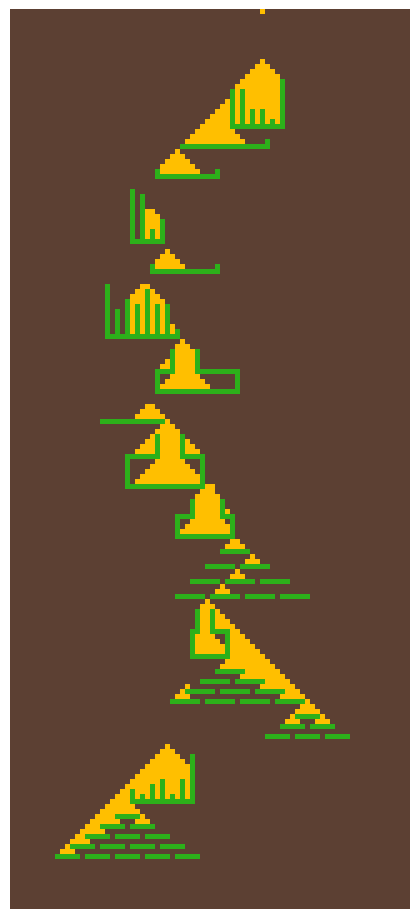

In [16]:
import numpy as np

with open('input.txt', 'r') as f:
    input = f.read()
input = input.splitlines()
start = 450
cave = [0 for _ in range(start, 530)]
cave = [cave[:] for _ in range(180)]
for line in input:
    points = line.split(' -> ')
    for i in range(len(points)-1):
        point = points[i]
        next_point = points[i+1]
        x, y = point.split(',')
        x = int(x) - start
        y = int(y)
        next_x, next_y = next_point.split(',')
        next_x = int(next_x) - start
        next_y = int(next_y)
        if x == next_x:
            for j in range(min(y, next_y), max(y, next_y)+1):
                cave[j][x] = 1
        else:
            for j in range(min(x, next_x), max(x, next_x)+1):
                cave[y][j] = 1
cave[0][500 - start] = 2
count = 0
x = 0
old = 0
y = 1
to_rest = 0
framecount = 0
cave = np.array(cave)
caves = []
while(True):
    startx = x
    count += 1
    if(count % 100 == 0):
        framecount += 1
        caves.append(cave.copy())
    if(count > 75000):
        break
    # print(x, startx, y, cave[y][500 - start + startx], cave[y][500 - start + startx - 1], cave[y][500 - start + startx + 1])
    if(cave[y + 1][500 - start + startx] != 1 and cave[y + 1][500 - start + startx] != 2):
        x = startx
    elif(cave[y + 1][500 - start + startx - 1] != 1 and cave[y + 1][500 - start + startx - 1] != 2):
        x = startx - 1
    elif(cave[y + 1][500 - start + startx + 1] != 1 and cave[y + 1][500 - start + startx + 1] != 2):
        x = startx + 1
    else:
        to_rest += 1
        cave[y][500 - start + startx] = 2
        x = 0
        y = 1
        continue
    cave[y][500 - start + startx] = old
    y += 1
    if(y >= 179):
        y = 1
        x = 0
    old = cave[y][500 - start + x]
    cave[y][500 - start + x] = 3
print(to_rest)
animate_fast("cave", caves, 4)

MovieWriter ffmpeg unavailable; using Pillow instead.


27551
558


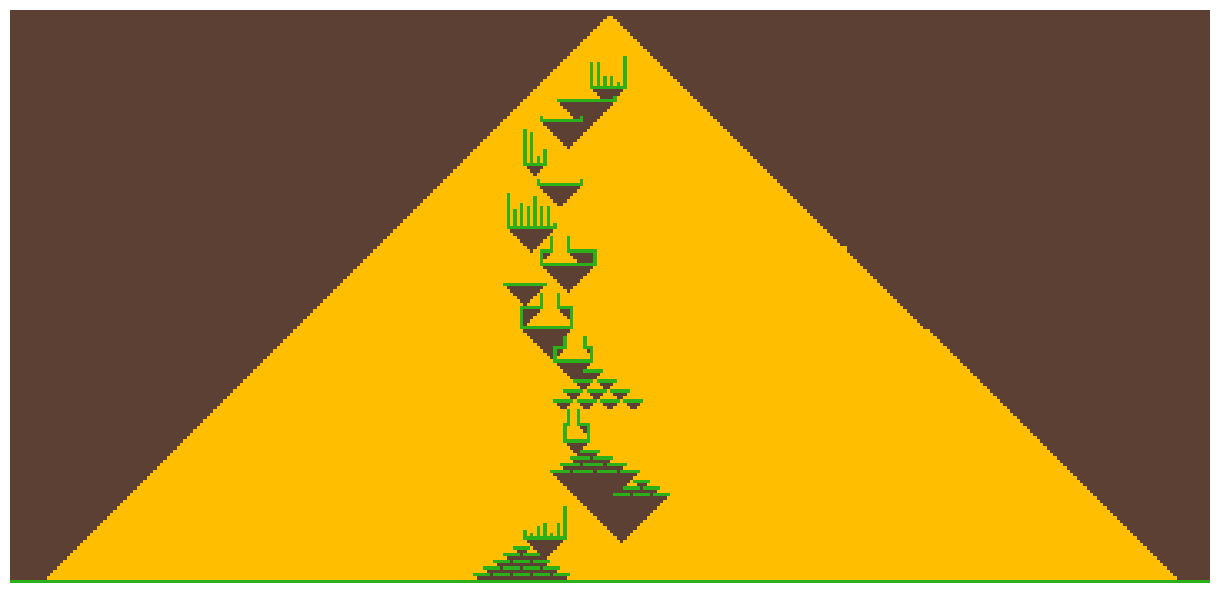

In [19]:
with open('input.txt', 'r') as f:
    input = f.read()
input = input.splitlines()
start = 320
end = 680
cave = [0 for _ in range(start, end)]
cave = [cave[:] for _ in range(172)]
for line in input:
    points = line.split(' -> ')
    for i in range(len(points)-1):
        point = points[i]
        next_point = points[i+1]
        x, y = point.split(',')
        x = int(x) - start
        y = int(y)
        next_x, next_y = next_point.split(',')
        next_x = int(next_x) - start
        next_y = int(next_y)
        if x == next_x:
            for j in range(min(y, next_y), max(y, next_y)+1):
                cave[j][x] = 1
        else:
            for j in range(min(x, next_x), max(x, next_x)+1):
                cave[y][j] = 1

cave[171] = [1 for _ in range(start, end)]
cave[0][500 - start] = 2
count = 0
x = 0
old = 0
y = 1
to_rest = 0
framecount = 0
cave = np.array(cave)
caves = []
while(True):
    startx = x
    count += 1
    if(count % (1000 + count // 200) == 0):
        framecount += 1
        caves.append(cave.copy())
    if(count > 3200000):
        break
    if(cave[y + 1][500 - start + startx] != 1 and cave[y + 1][500 - start + startx] != 2):
        x = startx
    elif(cave[y + 1][500 - start + startx - 1] != 1 and cave[y + 1][500 - start + startx - 1] != 2):
        x = startx - 1
    elif(cave[y + 1][500 - start + startx + 1] != 1 and cave[y + 1][500 - start + startx + 1] != 2):
        x = startx + 1
    else:
        to_rest += 1
        if(y == 0): 
            break
        cave[y][500 - start + startx] = 2
        x = 0
        y = 0
        continue
    cave[y][500 - start + startx] = old
    y += 1
    if(y >= 179):
        y = 1
        x = 0
    old = cave[y][500 - start + x]
    cave[y][500 - start + x] = 3
print(to_rest)
print(framecount)
animate_fast("cave_two", caves, 12)

